In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
RED = (255, 0, 0)
BLUE = (30, 144, 255)
PREY_MAX_SIZE = 300
PREY_MIN_SIZE = 50
file = "data\\100_200_2_2.csv"
file_removed = file.removeprefix("data\\")
sim_number = int(file_removed.split("_")[0])
prey_count = int(file_removed.split("_")[1])
pred1_count = int(file_removed.split("_")[2])
pred2_count = int(file_removed.split("_")[3].split(".")[0])
df = pd.read_csv(file)

Text(0.5, 0.98, '100 Simulations with 200 prey, 2 Optimal Forager and 2 Simple Forager')

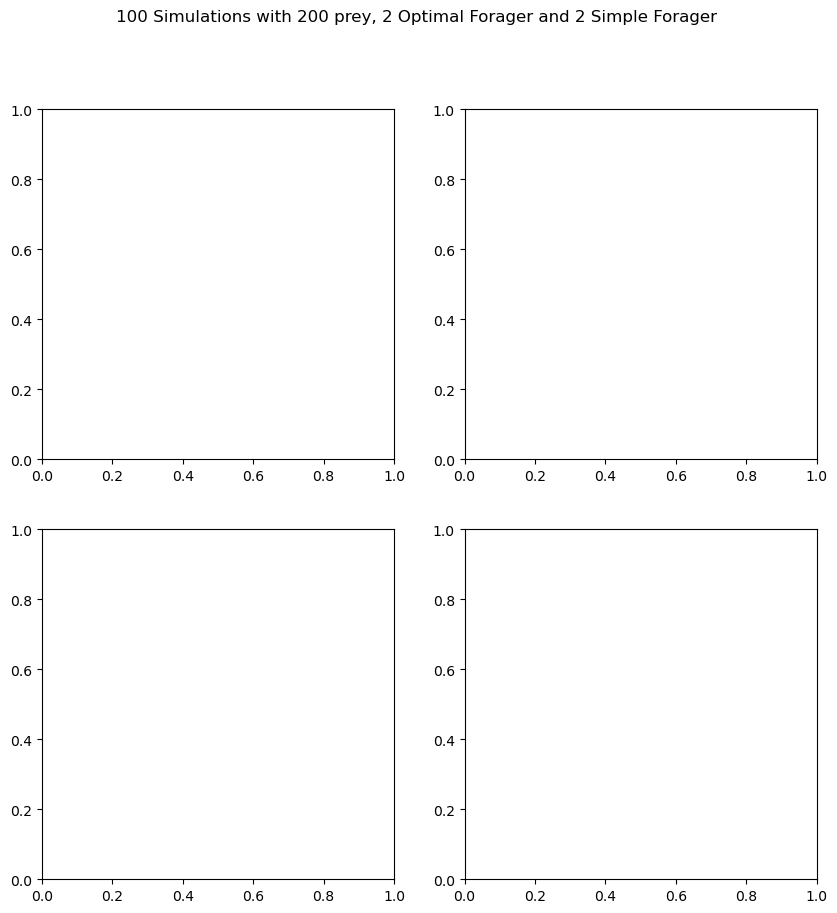

In [12]:
df = df[df["time"] < df.groupby("sim_number")["time"].max().mean()]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle(f"{sim_number} Simulations with {prey_count} prey, {pred1_count} Optimal Forager and {pred2_count} Simple Forager")

In [13]:
def list_converter(x):
    if type(x) == float:
        return float(x)
    else:
        for i in range(len(x)):
            x[i] = float(x[i])
        return x
pred1_eating_data = {}
pred2_eating_data = {}
if pred1_count > 1:
    df['pred1_energy'] = df['pred1_energy'].apply(lambda x: (x.split(',')))
    df['pred1_energy'] = df['pred1_energy'].apply(lambda x: list_converter(x))
    df['pred1_eating'] = df['pred1_eating'].apply(lambda x: (x.split(',')) if pd.notnull(x) else np.nan)
    df['pred1_eating'] = df['pred1_eating'].apply(lambda x: list_converter(x))

if pred2_count > 1:
    df['pred2_energy'] = df['pred2_energy'].apply(lambda x: (x.split(',')))
    df['pred2_energy'] = df['pred2_energy'].apply(lambda x: list_converter(x))
    df['pred2_eating'] = df['pred2_eating'].apply(lambda x: (x.split(',')) if pd.notnull(x) else np.nan)
    df['pred2_eating'] = df['pred2_eating'].apply(lambda x: list_converter(x))



In [14]:
sim_win = {}
for sim in range(1, sim_number+1):
    pred1_list_of_prey_sizes = []
    pred2_list_of_prey_sizes = []

    for index, row in df[df["sim_number"] == sim].iterrows():

        if row["pred1_mean_energy"] > row["pred2_mean_energy"]:
            sim_win[sim] = "pred1"
        elif row["pred1_mean_energy"] < row["pred2_mean_energy"]:
            sim_win[sim] = "pred2"
        else:
            sim_win[sim] = "draw"

        if type(row["pred1_eating"]) == list:
            for prey_size in row["pred1_eating"]:
                if prey_size not in pred1_list_of_prey_sizes:
                    pred1_list_of_prey_sizes.append(prey_size)
        elif pd.notna(row["pred1_eating"]):
            if row["pred1_eating"] not in pred1_list_of_prey_sizes:
                pred1_list_of_prey_sizes.append(row["pred1_eating"])

        if type(row["pred2_eating"]) == list:
            for prey_size in row["pred2_eating"]:
                if prey_size not in pred2_list_of_prey_sizes:
                    pred2_list_of_prey_sizes.append(prey_size)
        elif pd.notna(row["pred2_eating"]):
            if row["pred2_eating"] not in pred2_list_of_prey_sizes:
                pred2_list_of_prey_sizes.append(row["pred2_eating"])

    pred1_eating_data[sim] = pred1_list_of_prey_sizes
    pred2_eating_data[sim] = pred2_list_of_prey_sizes


In [15]:
sns.lineplot(df.groupby("sim_number")["pred1_mean_energy"].mean(), color = tuple(x / 255 for x in RED), label = "Optimal Forager Mean Energy", ax = axs[0, 0])
y1 = (df.groupby("sim_number")["pred1_mean_energy"].mean()).mean()
axs[0][0].axhline(y1, color = "darkred", label = "Optimal Forager Mean Line")
axs[0][0].fill_between(df.groupby("sim_number")["pred1_mean_energy"].mean().index, df.groupby("sim_number")["pred1_mean_energy"].mean(), color = tuple(x / 255 for x in RED), alpha = 0.2)
sns.lineplot(df.groupby("sim_number")["pred2_mean_energy"].mean(), color = tuple(x / 255 for x in BLUE), label = "Simple Forager Mean Energy", ax = axs[0, 0])
y2 = (df.groupby("sim_number")["pred2_mean_energy"].mean()).mean()
axs[0][0].axhline(y2, color = "darkblue", label = "Simple Forager Mean Line")
axs[0][0].fill_between(df.groupby("sim_number")["pred2_mean_energy"].mean().index, df.groupby("sim_number")["pred2_mean_energy"].mean(), color = tuple(x / 255 for x in BLUE), alpha = 0.2)
axs[0][0].fill_between(np.arange(1, sim_number+1), y1, y2, color = "black", alpha = 0.2, hatch = "x", label = "Difference in Mean Energy Lines")

axs[0][0].set_xlabel("Simulation Number")
axs[0][0].set_ylabel("Mean Energy")
axs[0][0].set_title("Mean Energy of Predators Over Simulations")
axs[0][0].legend()

In [16]:
grouped = df.groupby(df["time"])
sns.lineplot(grouped["pred1_mean_energy"].mean(), color = tuple(x / 255 for x in RED), label = "Optimal Forager Mean Energy", ax = axs[0, 1])
sns.lineplot(grouped["pred2_mean_energy"].mean(), color = tuple(x / 255 for x in BLUE), label = "Simple Forager Mean Energy", ax = axs[0, 1])
axs[0,1].fill_between(grouped["pred1_mean_energy"].mean().index, grouped["pred1_mean_energy"].mean(), grouped["pred2_mean_energy"].mean(), color = "black", alpha = 0.2, hatch = "x", label = "Difference in Mean Energy")
axs[0,1].set_xlabel("Time")
axs[0,1].set_ylabel("Mean Energy")
axs[0,1].set_title("Mean Energy of Predators Over Time")

Text(0.5, 1.0, 'Mean Energy of Predators Over Time')

In [17]:
sns.lineplot(grouped["mean_prey_size"].mean(), color = "green", label = "Mean Prey Size", ax = axs[1, 0])
axs[1, 0].set_ylim(PREY_MIN_SIZE, PREY_MAX_SIZE)
axs[1, 0].set_xlabel("Time")
axs[1, 0].set_ylabel("Mean Prey Size")
axs[1, 0].set_title("Mean Prey Size Over Time")

Text(0.5, 1.0, 'Mean Prey Size Over Time')

In [18]:
pred1_all_eating_data = []
pred2_all_eating_data = []
for keys, values in (pred1_eating_data.items()):
    for value in values:
        pred1_all_eating_data.append(value)
for keys, values in (pred2_eating_data.items()):
    for value in values:
        pred2_all_eating_data.append(value)

sns.histplot(pred1_all_eating_data, color = tuple(x / 255 for x in RED), bins = 10, label = "Optimal Forager", ax = axs[1, 1])
sns.histplot(pred2_all_eating_data, color = tuple(x / 255 for x in BLUE), bins = 10, label = "Simple Forager", ax = axs[1, 1])

axs[1,1].set_xlabel("Prey Size")
axs[1,1].set_ylabel("Frequency")
axs[1,1].set_title("Frequency of Prey Sizes Eaten by Predators")
axs[1,1].legend()

In [19]:
sim1_win = 0
sim2_win = 0
for i in sim_win.values():
    if i == "pred1":
        sim1_win += 1
    elif i == "pred2":
        sim2_win += 1

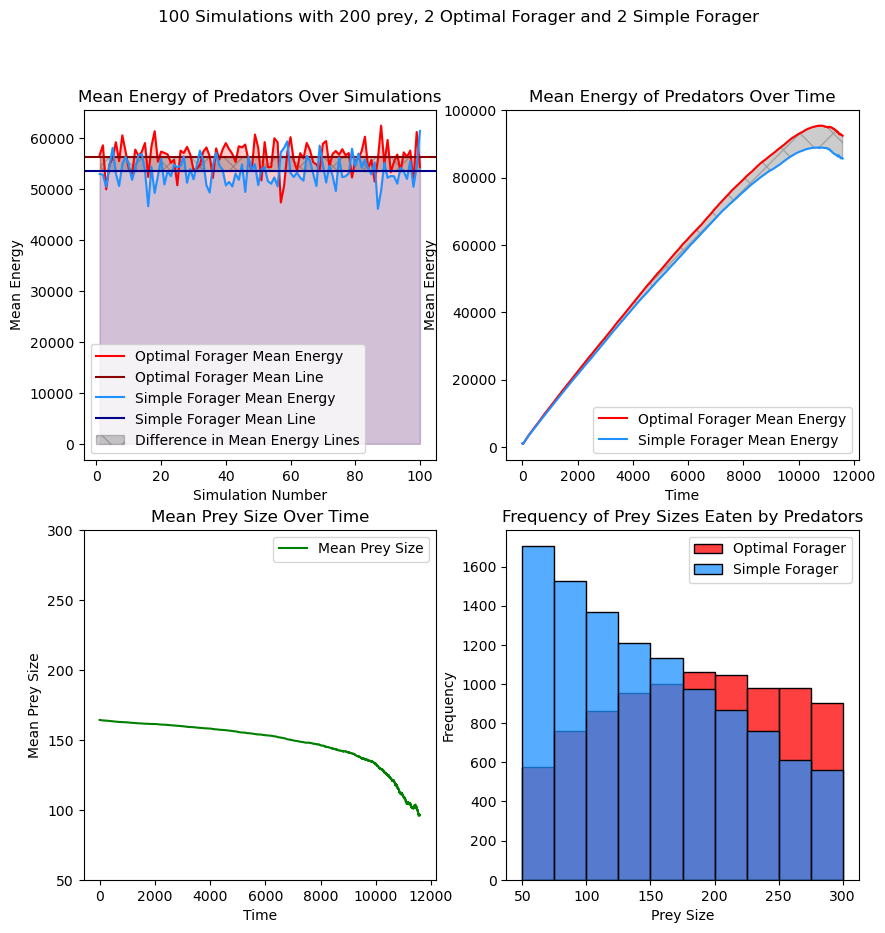

In [20]:
fig